<a href="https://colab.research.google.com/github/HoangHungLN/MachineLearning_Assignment/blob/main/Assignment3/notebooks/Assignment3_CEML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vì tổng dung lượng của thư mục ảnh là rất lớn nên nhóm sử dụng lfs của git để lưu trữ ảnh, khi chạy chương trình sẽ clone trực tiếp đến github của nhóm và pull dữ liệu lfs về để sử dụng cho quá trình thực hiện pipeline.

In [ ]:
#Khởi tạo và import thư viện
!git clone https://github.com/HoangHungLN/MachineLearning_Assignment.git
!cd MachineLearning_Assignment && git lfs pull

import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Cloning into 'MachineLearning_Assignment'...
remote: Enumerating objects: 13002, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 13002 (delta 58), reused 51 (delta 44), pack-reused 12925 (from 2)
Receiving objects: 100% (13002/13002), 62.54 MiB | 38.69 MiB/s, done.
Resolving deltas: 100% (238/238), done.
Updating files: 100% (12647/12647), done.
Filtering content: 100% (12601/12601), 218.78 MiB | 1.19 MiB/s, done.


In [ ]:
#Đường dẫn đến thư mục ảnh, và file chứa nhãn
base_dir = "MachineLearning_Assignment/Assignment3/data"
csv_path = os.path.join(base_dir, "Training_set.csv")
image_dir = os.path.join(base_dir, "HumanActionDataset")

Số lượng mẫu (số lượng ảnh): 12600

 Bảng thống kê số lượng ảnh cho mỗi lớp:

| Lớp                |   Số lượng ảnh |
|:-------------------|---------------:|
| sitting            |            840 |
| using_laptop       |            840 |
| hugging            |            840 |
| sleeping           |            840 |
| drinking           |            840 |
| clapping           |            840 |
| dancing            |            840 |
| cycling            |            840 |
| calling            |            840 |
| laughing           |            840 |
| eating             |            840 |
| fighting           |            840 |
| listening_to_music |            840 |
| running            |            840 |
| texting            |            840 |




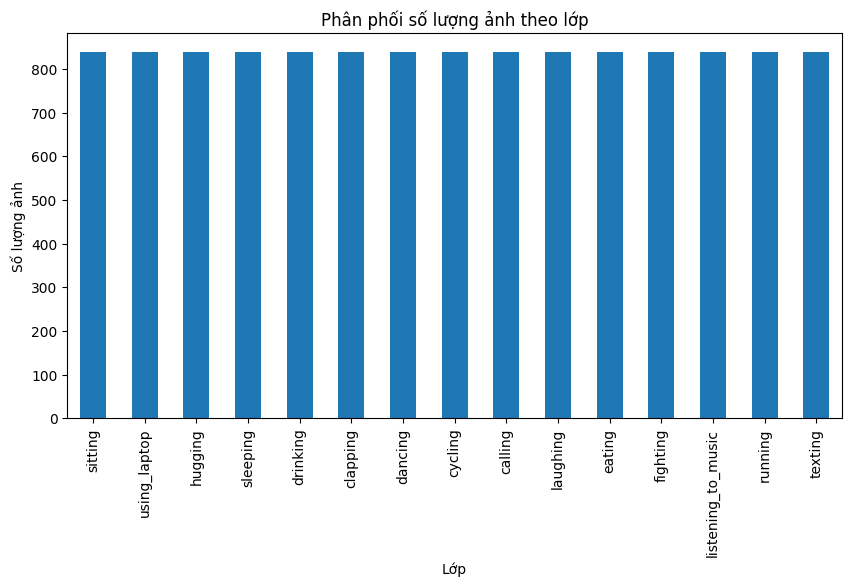

In [ ]:
#Đọc file csv để thống kê số lượng mẫu
df = pd.read_csv(csv_path)
print("Số lượng mẫu (số lượng ảnh):", len(df))

#Bảng thống kê số lượng ảnh cho mỗi lớp
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Lớp', 'Số lượng ảnh']
print("\n Bảng thống kê số lượng ảnh cho mỗi lớp:\n")
print(label_counts.to_markdown(index=False))
print("\n")

#Thống kê phân phối nhãn
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='bar')
plt.title("Phân phối số lượng ảnh theo lớp")
plt.xlabel("Lớp")
plt.ylabel("Số lượng ảnh")
plt.show()

##Thống kê số lượng ảnh cho mỗi lớp và phân phối nhãn
###Số lượng ảnh cho mỗi lớp
Tập dữ liệu gồm 12600 ảnh hoạt động của con người, chia đều cho 15 nhãn phân loại tương ứng với 15 loại hoạt động thường ngày.

Mỗi lớp phân loại gồm 840 ảnh. Cho thấy tập dữ liệu được thiết kế đồng đều và có quy mô phù hợp cho việc huấn luyện các mô hình học máy.
###Phân phối nhãn
Quan sát từ bảng thống kê và biểu đồ phân phối số lượng ảnh theo lớp, ta nhận thấy:

- Mỗi lớp có số lượng mẫu bằng nhau (840 ảnh).

- Không có lớp nào chiếm ưu thế vượt trội, nên tập dữ liệu hoàn toàn cân bằng.

Điều này là rất lý tưởng trong học máy, vì mô hình sẽ không bị thiên vị (bias) về phía một lớp cụ thể.
Bên cạnh đó, việc các lớp được phân bố đồng đều giúp mô hình học được đặc trưng của từng loại hoạt động một cách công bằng, từ đó giảm nguy cơ overfitting hoặc under-representation.

In [ ]:
# Thốngg kê kích thước ảnh
widths, heights, channels = [], [], []

for fname in df['filename'][:500]:
    fpath = os.path.join(image_dir, fname)
    if os.path.exists(fpath):
        with Image.open(fpath) as img:
            w, h = img.size
            c = len(img.getbands())
            widths.append(w)
            heights.append(h)
            channels.append(c)

stats_df = pd.DataFrame({
    "width": widths,
    "height": heights,
    "channels": channels
})


print("\nThống kê kích thước ảnh:")
print(stats_df.describe())

print("\nSố kênh màu:")
print(stats_df['channels'].value_counts())


Thống kê kích thước ảnh:
            width      height  channels
count  500.000000  500.000000     500.0
mean   260.646000  195.020000       3.0
std     42.399435   35.619448       0.0
min     84.000000   84.000000       3.0
25%    259.000000  181.000000       3.0
50%    275.000000  183.000000       3.0
75%    276.000000  194.000000       3.0
max    399.000000  300.000000       3.0

Số kênh màu:
channels
3    500
Name: count, dtype: int64


## Thống kê kích thước và kênh màu của ảnh
Vì số lượng ảnh là rất lớn nên nhóm không thể chạy thống kê cho toàn bộ tập dữ liệu, nhóm chỉ thống kê trên 500 ảnh mẫu đại diện cho tập dữ liệu nhằm tiết kiệm thời gian xử lý mà vẫn cung cấp được cái nhìn rõ hơn về tập dữ liệu.
### Kích thước ảnh
Tập dữ liệu được thống kê trên 500 ảnh mẫu cho thấy:
- Chiều rộng trung bình khoảng 260 pixel
- Chiều cao trung bình khoảng 195 pixel
- Kích thước ảnh dao động khá linh hoạt

Điều này cho thấy các ảnh trong tập dữ liệu không đồng nhất về kích thước, có thể do được thu thập từ nhiều nguồn khác nhau hoặc chưa qua bước tiền xử lý chuẩn hoá. Trước khi huấn luyện mô hình học máy, cần resize tất cả ảnh về cùng kích thước chuẩn.

### Số kênh màu
Tất cả 500 ảnh đều có 3 kênh màu (RGB).
Điều này chứng tỏ tập dữ liệu chỉ bao gồm ảnh màu, không có ảnh grayscale hay định dạng khác. Như vậy, mô hình có thể khai thác đầy đủ thông tin màu sắc để học các đặc trưng liên quan đến hành động
(ví dụ: quần áo, bối cảnh, vật thể).

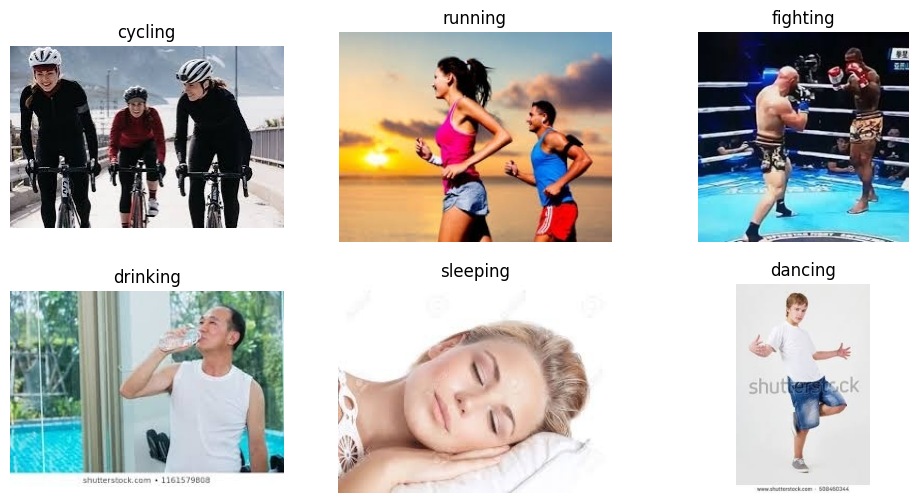

In [ ]:
#Hiển thị vài ảnh mẫu
sample_imgs = df.sample(6, random_state=42)
plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_imgs.itertuples()):
    img_path = os.path.join(image_dir, row.filename)
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(row.label)
    plt.axis("off")
plt.show()

##Tiền xử lý

Hàm `preprocessing()` chịu trách nhiệm thực hiện toàn bộ bước **tiền xử lý dữ liệu ảnh** trước khi đưa vào mô hình học máy. Cụ thể, hàm đọc thông tin ảnh và nhãn từ file CSV, chuyển đổi nhãn về dạng số, tạo đường dẫn tuyệt đối cho từng ảnh và chia dữ liệu thành ba tập: **train**, **validation** và **test** theo tỷ lệ định sẵn.  

Trong quá trình xử lý, mỗi ảnh được đọc từ ổ đĩa, giải mã, **resize** về kích thước chuẩn (224*224), sau đó **chuẩn hóa giá trị pixel** bằng hàm `preprocess_input` tương ứng với mô hình pretrained được chọn (VGG16, ResNet50 hoặc EfficientNetB0).  

Cuối cùng, dữ liệu được tổ chức dưới dạng **`tf.data.Dataset`** - một pipeline tối ưu cho TensorFlow, bao gồm các thao tác **batch**, **shuffle** và **prefetch** nhằm tăng tốc độ huấn luyện. Hàm trả về ba tập dữ liệu (`train_ds`, `val_ds`, `test_ds`) cùng với danh sách tên lớp (`class_names`), sẵn sàng cho bước trích xuất đặc trưng và huấn luyện mô hình.


In [ ]:
from MachineLearning_Assignment.Assignment3.modules.preprocessor import preprocessing
from MachineLearning_Assignment.Assignment3.modules.feature_extractor import run_extraction

In [ ]:
# # 4. Chạy pipeline trích xuất đặc trưng cho ResNet50
# print("--- Đang xử lý: ResNet50 ---")

# # 4.1. Tạo pipeline dữ liệu (chuẩn hóa cho ResNet50)
# train_ds_resnet, val_ds_resnet, test_ds_resnet, class_names = preprocessing(
#     image_dir=image_dir,
#     csv_path=csv_path,
#     model_name="ResNet50",
#     image_size=(224, 224),
#     batch_size=64, val_split=0.1, test_split=0.1
# )

# resnet_pipeline = {"train": train_ds_resnet, "val": val_ds_resnet, "test": test_ds_resnet}

# # 4.2. Chạy trích xuất và lưu file .npy
# run_extraction(
#     model_name="resnet50",
#     data_pipeline=resnet_pipeline,
#     output_dir="features_output/resnet50"
# )
# print("--- Hoàn thành: ResNet50 ---")

# del train_ds_resnet, val_ds_resnet, test_ds_resnet, resnet_pipeline

In [ ]:
# # # 5. Chạy pipeline trích xuất đặc trưng cho VGG16
# # print("\n--- Đang xử lý: VGG16 ---")

# # # 5.1. Tạo pipeline dữ liệu (chuẩn hóa cho VGG16)
# # train_ds_vgg, val_ds_vgg, test_ds_vgg, _ = preprocessing(
# #     image_dir=image_dir,
# #     csv_path=csv_path,
# #     model_name="VGG16",
# #     image_size=(224, 224),
# #     batch_size=64, val_split=0.1, test_split=0.1
# # )
# # vgg_pipeline = {"train": train_ds_vgg, "val": val_ds_vgg, "test": test_ds_vgg}

# # # 5.2. Chạy trích xuất và lưu file .npy
# # run_extraction(
# #     model_name="vgg16",
# #     data_pipeline=vgg_pipeline,
# #     output_dir="features_output/vgg16"
# # )
# # print("--- Hoàn thành: VGG16 ---")

# del train_ds_vgg, val_ds_vgg, test_ds_vgg, vgg_pipeline

In [ ]:
# # 6. Chạy pipeline trích xuất đặc trưng cho EfficientNetB0
# print("\n--- Đang xử lý: EfficientNetB0 ---")

# # 6.1. Tạo pipeline dữ liệu (chuẩn hóa cho EfficientNetB0)
# train_ds_eff, val_ds_eff, test_ds_eff, _ = preprocessing(
#     image_dir=image_dir,
#     csv_path=csv_path,
#     model_name="EfficientNetB0",
#     image_size=(224, 224),
#     batch_size=64, val_split=0.1, test_split=0.1
# )
# eff_pipeline = {"train": train_ds_eff, "val": val_ds_eff, "test": test_ds_eff}

# # 6.2. Chạy trích xuất và lưu file .npy
# run_extraction(
#     model_name="efficientnetb0",
#     data_pipeline=eff_pipeline,
#     output_dir="features_output/efficientnetb0"
# )
# print("--- Hoàn thành: EfficientNetB0 ---")

In [ ]:
import numpy as np

resnet50_features_dir = "MachineLearning_Assignment/Assignment3/features_output/resnet50"
effectientnetb0_features_dir = "MachineLearning_Assignment/Assignment3/features_output/efficientnetb0"
vgg16_features_dir = "MachineLearning_Assignment/Assignment3/features_output/vgg16"

X_resnet_train = np.load(f"{resnet50_features_dir}/X_train.npy")
y_resnet_train = np.load(f"{resnet50_features_dir}/y_train.npy")
X_resnet_val = np.load(f"{resnet50_features_dir}/X_val.npy")
y_resnet_val = np.load(f"{resnet50_features_dir}/y_val.npy")
X_resnet_test = np.load(f"{resnet50_features_dir}/X_test.npy")
y_resnet_test = np.load(f"{resnet50_features_dir}/y_test.npy")

X_effectientnet_train = np.load(f"{effectientnetb0_features_dir}/X_train.npy")
y_effectientnet_train = np.load(f"{effectientnetb0_features_dir}/y_train.npy")
X_effectientnet_val = np.load(f"{effectientnetb0_features_dir}/X_val.npy")
y_effectientnet_val = np.load(f"{effectientnetb0_features_dir}/y_val.npy")
X_effectientnet_test = np.load(f"{effectientnetb0_features_dir}/X_test.npy")
y_effectientnet_test = np.load(f"{effectientnetb0_features_dir}/y_test.npy")

X_vgg_train = np.load(f"{vgg16_features_dir}/X_train.npy")
y_vgg_train = np.load(f"{vgg16_features_dir}/y_train.npy")
X_vgg_val = np.load(f"{vgg16_features_dir}/X_val.npy")
y_vgg_val = np.load(f"{vgg16_features_dir}/y_val.npy")
X_vgg_test = np.load(f"{vgg16_features_dir}/X_test.npy")
y_vgg_test = np.load(f"{vgg16_features_dir}/y_test.npy")



In [ ]:
# import numpy as np

# # Tổng số mẫu (train/val/test & all)
# n_tr, n_va, n_te = len(y_vgg_train), len(y_vgg_val), len(y_vgg_test)
# n_all = n_tr + n_va + n_te

# # Số lớp
# num_classes1 = int(np.max([y_effectientnet_train.max(), y_effectientnet_val.max(), y_effectientnet_test.max()])) + 1
# num_classes2 = int(np.max([y_vgg_train.max(), y_vgg_val.max(), y_vgg_test.max()])) + 1
# num_classes3 = int(np.max([y_resnet_train.max(), y_resnet_val.max(), y_resnet_test.max()])) + 1

# # Phân bố theo lớp
# def count_per_class(y):
#     return np.bincount(y, minlength=num_classes3)


# print("Num classes:", num_classes2)
# print(f"Sizes  -> train:{n_tr}  val:{n_va}  test:{n_te}  total:{n_all}")
# print("Train per-class:", count_per_class(y_vgg_train))
# print("Val   per-class:", count_per_class(y_vgg_val))
# print("Test  per-class:", count_per_class(y_vgg_test))



In [ ]:
model_params = {
    # 1) RandomForest
    "RandomForest": [
        {"n_estimators": 200, "max_depth": None, "min_samples_split": 2, "min_samples_leaf": 1, "criterion": "gini", "max_features": "sqrt"},
        {"n_estimators": 100, "max_depth": 30,   "min_samples_split": 2, "min_samples_leaf": 2, "criterion": "entropy", "max_features": "log2"},
        {"n_estimators": 200, "max_depth": 20,   "min_samples_split": 2, "min_samples_leaf": 3, "criterion": "gini", "max_features": "sqrt"},
    ],

    # 2) Logistic Regression  (nên kèm StandardScaler trong pipeline)
    "LogisticRegression": [
        {"C": 1.0, "penalty": "l2", "solver": "lbfgs", "max_iter": 2000, "multi_class": "multinomial", "n_jobs": -1},
        {"C": 2.5, "penalty": "l2", "solver": "lbfgs", "max_iter": 2000, "n_jobs": -1, "l1_ratio":0.5},
        {"C": 2.0, "penalty": "l2", "solver": "lbfgs", "max_iter": 2000, "n_jobs": -1},
        {"C": 3.0, "penalty": "l2", "solver": "lbfgs", "max_iter": 3000, "n_jobs": -1},
        {"C": 4.0, "penalty": "l2", "solver": "lbfgs", "max_iter": 4000, "n_jobs": -1},
        {"C": 0.1, "penalty": "l2", "solver": "lbfgs", "max_iter": 4000, "n_jobs": -1},
        {"C": 0.05, "penalty": "l2", "solver": "lbfgs", "max_iter": 4000, "n_jobs": -1}
    ],

    "LinearSVC": [
        {"C": 3.0,"max_iter": 2000},
        {"C": 3.0,"max_iter": 9000},
        {"C": 4.0,"max_iter": 9000},
        {"C": 1.0, "max_iter": 10000},
        {"C": 2.5,"max_iter": 8000}
    ],

    # 4) Kernel SVM (SVC) — mạnh nhưng chậm; nhớ scale trước
    "SVC": [
        {"kernel": "rbf",    "C": 5.0, "gamma": "scale", "probability": False},
        {"kernel": "rbf",    "C": 2.0, "gamma": "scale", "probability": False},
        {"kernel": "rbf",    "C": 3.0, "gamma": "scale", "probability": False},
        {"kernel": "rbf",    "C": 4.0, "gamma": "scale", "probability": False},
        {"kernel": "rbf",    "C": 3.0, "gamma": 0.1,      "probability": True},
    ],
}

In [ ]:
from MachineLearning_Assignment.Assignment3.modules.run_model import *



In [ ]:
# =============RandomForest===================
rd_params_list = model_params['RandomForest']
best_rd_resnet_params = None
best_rd_resnet_accuracy = -1
best_rd_effectientnet_params = None
best_rd_effectientnet_accuracy = -1
best_rd_vgg_params = None
best_rd_vgg_accuracy = -1

rd_resnet_result = {}
rd_effectientnet_result = {}
rd_vgg_result = {}

print("\n--- Running Random Forest on ResNet50 features ---")
for params in rd_params_list:
  print(f"\nRunning with parameters: {params}")
  result_rd_resnet = run_models(X_resnet_train, y_resnet_train, X_resnet_val, y_resnet_val,
                      X_resnet_test, y_resnet_test, {'RandomForest': params}, print_reports =True, normalize = True)
  val_acc = result_rd_resnet['RandomForest']['val_acc']
  rd_resnet_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_rd_resnet_accuracy:
      best_rd_resnet_accuracy = val_acc
      best_rd_resnet_params = params
      best_rd_resnet_model = result_rd_resnet['RandomForest']['model']

print("\n--- Running Random Forest on EffectientnetB0 features ---")
for params in rd_params_list:
  print(f"\nRunning with parameters: {params}")
  result_rd_effectientnet = run_models(X_effectientnet_train, y_effectientnet_train,
                                       X_effectientnet_val, y_effectientnet_val,
                                       X_effectientnet_test, y_effectientnet_test,
                                       {'RandomForest': params}, print_reports =True,
                                       normalize = True)
  val_acc = result_rd_effectientnet['RandomForest']['val_acc']
  rd_effectientnet_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_rd_effectientnet_accuracy:
      best_rd_effectientnet_accuracy = val_acc
      best_rd_effectientnet_params = params
      best_rd_effectientnet_model = result_rd_effectientnet['RandomForest']['model']

print("\n --- Running Random Forest on VGG16 features ---")
for params in rd_params_list:
  print(f"\nRunning with parameters: {params}")
  result_rd_vgg = run_models(X_vgg_train, y_vgg_train, X_vgg_val, y_vgg_val,
                      X_vgg_test, y_vgg_test, {'RandomForest': params}, print_reports =True, normalize = True)
  val_acc = result_rd_vgg['RandomForest']['val_acc']
  rd_vgg_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_rd_vgg_accuracy:
      best_rd_vgg_accuracy = val_acc
      best_rd_vgg_params = params
      best_rd_vgg_model = result_rd_vgg['RandomForest']['model']
print("\n--- Mô hình RandomForest với tham số tốt nhất trong các mô hình đã kiểm tra ---")
if best_rd_resnet_model:
    best_rd_resnet_accuracy = evaluate_model_on_test(best_rd_resnet_model, X_resnet_test, y_resnet_test, f"Random Forest (ResNet50) Best Params: {best_rd_resnet_params}")
    rd_resnet_result[str(best_rd_resnet_params)]['test_accuracy'] = best_rd_resnet_accuracy
if best_rd_effectientnet_model:
    best_rd_effectientnet_accuracy = evaluate_model_on_test(best_rd_effectientnet_model, X_effectientnet_test, y_effectientnet_test, f"Random Forest (EffectientnetB0) Best Params: {best_rd_effectientnet_params}")
    rd_effectientnet_result[str(best_rd_effectientnet_params)]['test_accuracy'] = best_rd_effectientnet_accuracy
if best_rd_vgg_model:
    best_rd_vgg_accuracy = evaluate_model_on_test(best_rd_vgg_model, X_vgg_test, y_vgg_test, f"Random Forest (VGG16) Best Params: {best_rd_vgg_params}")
    rd_vgg_result[str(best_rd_vgg_params)]['test_accuracy'] = best_rd_vgg_accuracy




--- Running Random Forest on ResNet50 features ---

Running with parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': 'sqrt'}
[RandomForest] VAL acc = 0.6214285714285714

Running with parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy', 'max_features': 'log2'}
[RandomForest] VAL acc = 0.5912698412698413

Running with parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'criterion': 'gini', 'max_features': 'sqrt'}
[RandomForest] VAL acc = 0.6365079365079365

--- Running Random Forest on EffectientnetB0 features ---

Running with parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': 'sqrt'}
[RandomForest] VAL acc = 0.6563492063492063

Running with parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_

### Nhận xét mô hình Random Forest

**Tổng quan mô hình**  
Mô hình **Random Forest** cho kết quả khá thấp khi sử dụng đặc trưng từ **VGG16** và **ResNet50**, chỉ đạt khoảng **60–65%** độ chính xác trên test. Điều này cho thấy Random Forest không phải là lựa chọn tốt nhất khi làm việc với các đặc trưng có chiều cao và có tính liên tục như các đặc trưng từ mạng học sâu.

Mặc dù Random Forest có thể hoạt động tốt với các bộ dữ liệu có tính phân tách rõ ràng và không yêu cầu chuẩn hóa, nhưng khi làm việc với đặc trưng học sâu từ CNN, mô hình này dễ bị **overfit** và không khai thác hết được sức mạnh của các đặc trưng.

**Nhận xét về kết quả**  
Kết quả của **Random Forest** kém nhất trong các mô hình thử nghiệm, đặc biệt khi sử dụng **VGG16** với độ chính xác chỉ khoảng **60%**. Các lớp khó phân biệt không được mô hình nhận diện tốt. Điều này có thể do Random Forest không phù hợp với đặc trưng từ các mô hình học sâu.

**Tham số tốt nhất**  
Đối với **Random Forest**, tham số tốt nhất là **n_estimators = 200**, **max_depth = None**, vì số cây lớn giúp mô hình học được nhiều mẫu hơn và không bị overfitting quá mạnh. Tuy nhiên, mô hình này vẫn không đạt hiệu suất như SVC hay LinearSVC khi làm việc với các đặc trưng học sâu.

**Nhận xét chung**  
**Random Forest** là một mô hình có thể hoạt động tốt trong một số trường hợp, nhưng với đặc trưng học sâu từ CNN, mô hình này không khai thác được hết sức mạnh của các đặc trưng. Đặc biệt khi kết hợp với các đặc trưng như **VGG16**, mô hình này cho kết quả khá kém. Vì vậy, không nên sử dụng Random Forest cho các bài toán với đặc trưng từ mạng học sâu.

In [ ]:
# =============LogisticRegression===================
lr_params_list = model_params['LogisticRegression']
best_lr_resnet_params = None
best_lr_resnet_accuracy = -1
best_lr_effectientnet_params = None
best_lr_effectientnet_accuracy = -1
best_lr_vgg_params = None
best_lr_vgg_accuracy = -1

lr_resnet_result = {}
lr_effectientnet_result = {}
lr_vgg_result = {}

print("\n--- Running Logistic Regression on ResNet50 features ---")
for params in lr_params_list:
  print(f"\nRunning with parameters: {params}")
  result_lr_resnet = run_models(X_resnet_train, y_resnet_train, X_resnet_val, y_resnet_val,
                      X_resnet_test, y_resnet_test, {'LogisticRegression': params}, print_reports =True, pca = False, normalize = True)
  val_acc = result_lr_resnet['LogisticRegression']['val_acc']
  lr_resnet_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_lr_resnet_accuracy:
      best_lr_resnet_accuracy = val_acc
      best_lr_resnet_params = params
      best_lr_resnet_model = result_lr_resnet['LogisticRegression']['model']

print("\n--- Running Logistic Regression on EffectientnetB0 features ---")
for params in lr_params_list:
  print(f"\nRunning with parameters: {params}")
  result_lr_effectientnet = run_models(X_effectientnet_train, y_effectientnet_train, X_effectientnet_val, y_effectientnet_val,
                      X_effectientnet_test, y_effectientnet_test, {'LogisticRegression': params}, print_reports =True, pca = False, normalize = True)
  val_acc = result_lr_effectientnet['LogisticRegression']['val_acc']
  lr_effectientnet_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_lr_effectientnet_accuracy:
      best_lr_effectientnet_accuracy = val_acc
      best_lr_effectientnet_params = params
      best_lr_effectientnet_model = result_lr_effectientnet['LogisticRegression']['model']

print("\n --- Running Logistic Regression on VGG16 features ---")
for params in lr_params_list:
  print(f"\nRunning with parameters: {params}")
  result_lr_vgg = run_models(X_vgg_train, y_vgg_train, X_vgg_val, y_vgg_val,
                      X_vgg_test, y_vgg_test, {'LogisticRegression': params}, print_reports =True, pca = False, normalize = True)
  val_acc = result_lr_vgg['LogisticRegression']['val_acc']
  lr_vgg_result[str(params)] = {'val_acc': val_acc}

  if val_acc > best_lr_vgg_accuracy:
      best_lr_vgg_accuracy = val_acc
      best_lr_vgg_params = params
      best_lr_vgg_model = result_lr_vgg['LogisticRegression']['model']
print("\n--- Mô hình LogisticRegression với tham số tốt nhất trong các mô hình đã kiểm tra ---")
if best_lr_resnet_model:
    best_lr_resnet_accuracy = evaluate_model_on_test(best_lr_resnet_model, X_resnet_test, y_resnet_test, f"Logistic Regression (ResNet50) Best Params: {best_lr_resnet_params}")
    lr_resnet_result[str(best_lr_resnet_params)]['test_accuracy'] = best_lr_resnet_accuracy
if best_lr_effectientnet_model:
    best_lr_effectientnet_accuracy = evaluate_model_on_test(best_lr_effectientnet_model, X_effectientnet_test, y_effectientnet_test, f"Logistic Regression (EffectientnetB0) Best Params: {best_lr_effectientnet_params}")
    lr_effectientnet_result[str(best_lr_effectientnet_params)]['test_accuracy'] = best_lr_effectientnet_accuracy
if best_lr_vgg_model:
    best_lr_vgg_accuracy = evaluate_model_on_test(best_lr_vgg_model, X_vgg_test, y_vgg_test, f"Logistic Regression (VGG16) Best Params: {best_lr_vgg_params}")
    lr_vgg_result[str(best_lr_vgg_params)]['test_accuracy'] = best_lr_vgg_accuracy


--- Running Logistic Regression on ResNet50 features ---

Running with parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'multi_class': 'multinomial', 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6976190476190476

Running with parameters: {'C': 2.5, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'n_jobs': -1, 'l1_ratio': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[LogisticRegression] VAL acc = 0.703968253968254

Running with parameters: {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.7

Running with parameters: {'C': 3.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 3000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.7031746031746032

Running with parameters: {'C': 4.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.7087301587301588

Running with parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6238095238095238

Running with parameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6063492063492063

--- Running Logistic Regression on EffectientnetB0 features ---

Running with parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'multi_class': 'multinomial', 'n_j

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[LogisticRegression] VAL acc = 0.7492063492063492

Running with parameters: {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.7436507936507937

Running with parameters: {'C': 3.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 3000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.7507936507936508

Running with parameters: {'C': 4.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.75

Running with parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6777777777777778

Running with parameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6484126984126984

 --- Running Logistic Regression on VGG16 features ---

Running with parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'multi_class': 'multinomial', 'n_jobs': -

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[LogisticRegression] VAL acc = 0.669047619047619

Running with parameters: {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 2000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.669047619047619

Running with parameters: {'C': 3.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 3000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6706349206349206

Running with parameters: {'C': 4.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.6714285714285714

Running with parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.5857142857142857

Running with parameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 4000, 'n_jobs': -1}
[LogisticRegression] VAL acc = 0.5603174603174603

--- Mô hình LogisticRegression với tham số tốt nhất trong các mô hình đã kiểm tra ---

--- Đánh giá mô hình Logistic Regression (ResNet50) Best Params: {'C': 4.0, 'penalty': '

### Nhận xét mô hình Logistic Regression

**Tổng quan mô hình**  
Mô hình **Logistic Regression** cho kết quả tương đối tốt với độ chính xác trên test khoảng **74%**, đặc biệt khi kết hợp với **EfficientNetB0** và **ResNet50**. Đây là mô hình tuyến tính, thích hợp cho các đặc trưng đã được chuẩn hóa và có phân tách tốt, tương tự như LinearSVC, nhưng cho phép tính toán xác suất cho các dự đoán.

Tuy nhiên, giống như LinearSVC, Logistic Regression gặp khó khăn với các dữ liệu có mối quan hệ phi tuyến tính rõ rệt, và có thể không đạt hiệu suất tốt nhất khi sử dụng các đặc trưng yếu hơn như **VGG16**.

**Nhận xét về kết quả**  
Logistic Regression cho kết quả khá ổn với **EfficientNetB0** và **ResNet50** (74%). Tuy nhiên, kết quả thấp hơn một chút khi sử dụng **VGG16** (68%). Các chỉ số **Precision**, **Recall**, và **F1-score** trên các lớp chính khá ổn, nhưng vẫn có sự chênh lệch giữa các lớp khó phân biệt.

**Tham số tốt nhất**  
Đối với **Logistic Regression**, tham số **C = 3–4**, solver `lbfgs` và **max_iter = 3000** là các tham số tốt nhất. Việc chọn giá trị **C** thích hợp giúp điều chỉnh mức độ phức tạp của mô hình, trong khi solver `lbfgs` tối ưu hóa quá trình huấn luyện. Việc sử dụng **max_iter lớn** giúp mô hình hội tụ tốt hơn trên các tập dữ liệu lớn và phức tạp.

**Nhận xét chung**  
Logistic Regression là một mô hình đơn giản và hiệu quả, đặc biệt khi đặc trưng dữ liệu đã được chuẩn hóa. Mô hình này dễ dàng triển khai và mang lại kết quả khá ổn với các đặc trưng phân tách tốt. Tuy nhiên, hiệu suất có thể giảm khi dữ liệu có mối quan hệ phi tuyến rõ rệt.


In [ ]:
# ============= LinearSVC ===================
lsvc_params_list = model_params['LinearSVC']
best_lsvc_resnet_params = None
best_lsvc_resnet_accuracy = -1
best_lsvc_efficientnet_params = None
best_lsvc_efficientnet_accuracy = -1
best_lsvc_vgg_params = None
best_lsvc_vgg_accuracy = -1

lsvc_resnet_result = {}
lsvc_efficientnet_result = {}
lsvc_vgg_result = {}

print("\n--- Running LinearSVC on ResNet50 features ---")
for params in lsvc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_lsvc_resnet = run_models(
        X_resnet_train, y_resnet_train,
        X_resnet_val,   y_resnet_val,
        X_resnet_test,  y_resnet_test,
        {'LinearSVC': params},  # hoặc {'SVM': params} nếu hàm của bạn dùng key 'SVM' cho LinearSVC
        print_reports=True, pca = False, normalize =  True
    )
    val_acc = result_lsvc_resnet['LinearSVC']['val_acc']
    lsvc_resnet_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_lsvc_resnet_accuracy:
        best_lsvc_resnet_accuracy = val_acc
        best_lsvc_resnet_params = params
        best_lsvc_resnet_model = result_lsvc_resnet['LinearSVC']['model']

print("\n--- Running LinearSVC on EfficientNetB0 features ---")
for params in lsvc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_lsvc_efficientnet = run_models(
        X_effectientnet_train, y_effectientnet_train,
        X_effectientnet_val,   y_effectientnet_val,
        X_effectientnet_test,  y_effectientnet_test,
        {'LinearSVC': params},
        print_reports=True, pca = False, normalize = True
    )
    val_acc = result_lsvc_efficientnet['LinearSVC']['val_acc']
    lsvc_efficientnet_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_lsvc_efficientnet_accuracy:
        best_lsvc_efficientnet_accuracy = val_acc
        best_lsvc_efficientnet_params = params
        best_lsvc_efficientnet_model = result_lsvc_efficientnet['LinearSVC']['model']

print("\n--- Running LinearSVC on VGG16 features ---")
for params in lsvc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_lsvc_vgg = run_models(
        X_vgg_train, y_vgg_train,
        X_vgg_val,   y_vgg_val,
        X_vgg_test,  y_vgg_test,
        {'LinearSVC': params},
        print_reports=True, pca = False, normalize = True
    )
    val_acc = result_lsvc_vgg['LinearSVC']['val_acc']   # (fix tên biến)
    lsvc_vgg_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_lsvc_vgg_accuracy:
        best_lsvc_vgg_accuracy = val_acc
        best_lsvc_vgg_params = params
        best_lsvc_vgg_model = result_lsvc_vgg['LinearSVC']['model']

print("\n--- LinearSVC: đánh giá mô hình best trên TEST ---")
if best_lsvc_resnet_model:
    acc = evaluate_model_on_test(best_lsvc_resnet_model, X_resnet_test, y_resnet_test,
                                 f"LinearSVC (ResNet50) Best Params: {best_lsvc_resnet_params}")
    lsvc_resnet_result[str(best_lsvc_resnet_params)]['test_accuracy'] = acc
if best_lsvc_efficientnet_model:
    acc = evaluate_model_on_test(best_lsvc_efficientnet_model, X_effectientnet_test, y_effectientnet_test,
                                 f"LinearSVC (EfficientNetB0) Best Params: {best_lsvc_efficientnet_params}")
    lsvc_efficientnet_result[str(best_lsvc_efficientnet_params)]['test_accuracy'] = acc
if best_lsvc_vgg_model:
    acc = evaluate_model_on_test(best_lsvc_vgg_model, X_vgg_test, y_vgg_test,
                                 f"LinearSVC (VGG16) Best Params: {best_lsvc_vgg_params}")
    lsvc_vgg_result[str(best_lsvc_vgg_params)]['test_accuracy'] = acc


--- Running LinearSVC on ResNet50 features ---

Running with parameters: {'C': 3.0, 'max_iter': 2000}
[LinearSVC] VAL acc = 0.707936507936508

Running with parameters: {'C': 3.0, 'max_iter': 9000}
[LinearSVC] VAL acc = 0.707936507936508

Running with parameters: {'C': 4.0, 'max_iter': 9000}
[LinearSVC] VAL acc = 0.7055555555555556

Running with parameters: {'C': 1.0, 'max_iter': 10000}
[LinearSVC] VAL acc = 0.7134920634920635

Running with parameters: {'C': 2.5, 'max_iter': 8000}
[LinearSVC] VAL acc = 0.7087301587301588

--- Running LinearSVC on EfficientNetB0 features ---

Running with parameters: {'C': 3.0, 'max_iter': 2000}
[LinearSVC] VAL acc = 0.7444444444444445

Running with parameters: {'C': 3.0, 'max_iter': 9000}
[LinearSVC] VAL acc = 0.7444444444444445

Running with parameters: {'C': 4.0, 'max_iter': 9000}
[LinearSVC] VAL acc = 0.7373015873015873

Running with parameters: {'C': 1.0, 'max_iter': 10000}
[LinearSVC] VAL acc = 0.746031746031746

Running with parameters: {'C': 2.5

### Nhận xét mô hình LinearSVC

**Tổng quan mô hình**  
Mô hình **LinearSVC** hoạt động khá ổn khi sử dụng các đặc trưng học sâu như **EfficientNetB0** và **ResNet50**, với độ chính xác đạt khoảng **75.1%** đối với **EfficientNetB0**. LinearSVC là một mô hình tuyến tính, vì vậy nó có xu hướng hoạt động tốt khi các đặc trưng đã được phân tách rõ ràng. Tuy nhiên, hiệu suất có thể giảm khi gặp các bộ dữ liệu có độ phức tạp cao hoặc mối quan hệ phi tuyến tính như với **GloVe**.

Mô hình này phù hợp khi dữ liệu không quá phức tạp và có thể được phân loại tốt với một ranh giới tuyến tính. Bởi vì không cần phải tối ưu hóa các kernel như SVC, **LinearSVC** là lựa chọn nhanh chóng và hiệu quả cho các tập dữ liệu có đặc trưng tuyến tính.

**Nhận xét về kết quả**  
LinearSVC hoạt động khá ổn với các đặc trưng từ **EfficientNetB0** và **ResNet50**, cho độ chính xác khá cao (~75%). Tuy nhiên, khi sử dụng **VGG16**, mô hình có phần kém hiệu quả hơn, với độ chính xác chỉ đạt khoảng **66%**. Điều này cho thấy LinearSVC hoạt động tốt nhất với các đặc trưng phân tách tốt từ các mạng học sâu hiện đại.

**Tham số tốt nhất**  
Với **LinearSVC**, tham số tốt nhất là **C = 1**, và **max_iter = 10000**, giúp đảm bảo mô hình học đủ các đặc trưng mà không bị overfitting. Đối với các đặc trưng như **EfficientNetB0**, giá trị C nhỏ giúp điều chỉnh mô hình tránh việc học quá khớp với dữ liệu huấn luyện, trong khi **max_iter** lớn giúp mô hình hội tụ nhanh hơn với các tập dữ liệu phức tạp.

**Nhận xét chung**  
LinearSVC là một lựa chọn tuyệt vời khi đặc trưng dữ liệu đã được chuẩn hóa và có phân tách rõ ràng. Mô hình này hoạt động nhanh và dễ triển khai, nhưng hiệu suất có thể giảm nếu đặc trưng không đủ phân tách. **C = 1** là giá trị lý tưởng cho mô hình này khi kết hợp với **EfficientNetB0**.

In [ ]:
# ============= SVC ===================
svc_params_list = model_params['SVC']

best_svc_resnet_params = None
best_svc_resnet_accuracy = -1
best_svc_efficientnet_params = None
best_svc_efficientnet_accuracy = -1
best_svc_vgg_params = None
best_svc_vgg_accuracy = -1

svc_resnet_result = {}
svc_efficientnet_result = {}
svc_vgg_result = {}

print("\n--- Running SVC on ResNet50 features ---")
for params in svc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_svc_resnet = run_models(
        X_resnet_train, y_resnet_train,
        X_resnet_val,   y_resnet_val,
        X_resnet_test,  y_resnet_test,
        {'SVC': params},
        print_reports=True, pca = False, normalize = True
    )
    val_acc = result_svc_resnet['SVC']['val_acc']
    svc_resnet_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_svc_resnet_accuracy:
        best_svc_resnet_accuracy = val_acc
        best_svc_resnet_params = params
        best_svc_resnet_model = result_svc_resnet['SVC']['model']

print("\n--- Running SVC on EfficientNetB0 features ---")
for params in svc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_svc_efficientnet = run_models(
        X_effectientnet_train, y_effectientnet_train,
        X_effectientnet_val,   y_effectientnet_val,
        X_effectientnet_test,  y_effectientnet_test,
        {'SVC': params},
        print_reports=True, pca = False, normalize = True
    )
    val_acc = result_svc_efficientnet['SVC']['val_acc']
    svc_efficientnet_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_svc_efficientnet_accuracy:
        best_svc_efficientnet_accuracy = val_acc
        best_svc_efficientnet_params = params
        best_svc_efficientnet_model = result_svc_efficientnet['SVC']['model']

print("\n--- Running SVC on VGG16 features ---")
for params in svc_params_list:
    print(f"\nRunning with parameters: {params}")
    result_svc_vgg = run_models(
        X_vgg_train, y_vgg_train,
        X_vgg_val,   y_vgg_val,
        X_vgg_test,  y_vgg_test,
        {'SVC': params},
        print_reports=True, pca = False, normalize = True
    )
    val_acc = result_svc_vgg['SVC']['val_acc']
    svc_vgg_result[str(params)] = {'val_acc': val_acc}
    if val_acc > best_svc_vgg_accuracy:
        best_svc_vgg_accuracy = val_acc
        best_svc_vgg_params = params
        best_svc_vgg_model = result_svc_vgg['SVC']['model']

print("\n--- SVC: đánh giá mô hình best trên TEST ---")
if 'best_svc_resnet_model' in locals():
    acc = evaluate_model_on_test(best_svc_resnet_model, X_resnet_test, y_resnet_test,
                                 f"SVC (ResNet50) Best Params: {best_svc_resnet_params}")
    svc_resnet_result[str(best_svc_resnet_params)]['test_accuracy'] = acc
if 'best_svc_efficientnet_model' in locals():
    acc = evaluate_model_on_test(best_svc_efficientnet_model, X_effectientnet_test, y_effectientnet_test,
                                 f"SVC (EfficientNetB0) Best Params: {best_svc_efficientnet_params}")
    svc_efficientnet_result[str(best_svc_efficientnet_params)]['test_accuracy'] = acc
if 'best_svc_vgg_model' in locals():
    acc = evaluate_model_on_test(best_svc_vgg_model, X_vgg_test, y_vgg_test,
                                 f"SVC (VGG16) Best Params: {best_svc_vgg_params}")
    svc_vgg_result[str(best_svc_vgg_params)]['test_accuracy'] = acc


--- Running SVC on ResNet50 features ---

Running with parameters: {'kernel': 'rbf', 'C': 5.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7365079365079366

Running with parameters: {'kernel': 'rbf', 'C': 2.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7396825396825397

Running with parameters: {'kernel': 'rbf', 'C': 3.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7404761904761905

Running with parameters: {'kernel': 'rbf', 'C': 4.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7388888888888889

Running with parameters: {'kernel': 'rbf', 'C': 3.0, 'gamma': 0.1, 'probability': True}
[SVC] VAL acc = 0.6904761904761905

--- Running SVC on EfficientNetB0 features ---

Running with parameters: {'kernel': 'rbf', 'C': 5.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7682539682539683

Running with parameters: {'kernel': 'rbf', 'C': 2.0, 'gamma': 'scale', 'probability': False}
[SVC] VAL acc = 0.7642857142857142

Running wit

### Nhận xét mô hình SVC (RBF)

**Tổng quan mô hình**  
Mô hình SVC với kernel RBF đã cho kết quả khá ấn tượng trong việc phân loại, đặc biệt khi kết hợp với đặc trưng từ **EfficientNetB0**. Độ chính xác của mô hình trên tập test đạt khoảng **77.6%**, đây là một kết quả khá tốt, cho thấy SVC hoạt động mạnh mẽ với các đặc trưng học sâu từ CNN. Tuy nhiên, mô hình có phần kém hiệu quả hơn khi sử dụng **VGG16**, nơi độ chính xác giảm xuống chỉ còn khoảng **60%**. Điều này phản ánh sự phù hợp của SVC đối với các đặc trưng mạnh mẽ và phân tách tốt từ các mạng CNN hiện đại.

SVC hoạt động tốt nhất khi trích xuất đặc trưng từ những mạng học sâu như **EfficientNetB0**, nơi các đặc trưng có tính phân tách rõ ràng và ổn định, giúp mô hình học được ranh giới phân lớp hiệu quả hơn. Nhìn chung, **SVC (RBF)** là lựa chọn tuyệt vời khi các đặc trưng được chuẩn hóa và có độ phân tách rõ ràng, giúp mô hình tối ưu hóa biên quyết định phi tuyến tính.

**Nhận xét về kết quả**  
Với đặc trưng từ **EfficientNetB0**, SVC đạt kết quả khá cao với **Test Accuracy ≈ 77.6%**. Các chỉ số như **Precision**, **Recall**, và **F1-score** đều khá ổn định và cao, đặc biệt trên các lớp chính của bộ dữ liệu. Tuy nhiên, khi sử dụng các đặc trưng khác như **VGG16**, kết quả không tốt, đặc biệt là ở các lớp khó phân biệt. Điều này có thể do đặc trưng từ VGG16 thiếu tính phân tách rõ rệt, làm ảnh hưởng đến khả năng phân loại chính xác của mô hình.

**Tham số tốt nhất**  
Trong các thí nghiệm, tham số tốt nhất cho **SVC (RBF)** là **C ≈ 5**, **gamma = "scale"**. Tham số **C** giúp điều chỉnh mức độ phức tạp của mô hình, với giá trị nhỏ giúp giảm overfitting, trong khi giá trị lớn có thể làm mô hình trở nên quá phức tạp và dễ bị overfit. Với **EfficientNetB0**, tham số **C = 5** là lý tưởng vì nó giúp cân bằng giữa độ phức tạp của mô hình và khả năng tổng quát. Điều này giúp mô hình học được biên quyết định phù hợp, tránh overfitting khi sử dụng các đặc trưng đã được chuẩn hóa và có độ phân tách cao.

**Nhận xét chung**  
Mô hình **SVC (RBF)** là một sự lựa chọn mạnh mẽ khi kết hợp với các đặc trưng trích xuất từ các mạng CNN hiện đại như **EfficientNetB0**. Tuy nhiên, hiệu suất giảm khi sử dụng các đặc trưng yếu hơn như **VGG16**, do sự thiếu phân tách rõ ràng trong các đặc trưng này. Việc tinh chỉnh tham số **C** và **gamma** cũng rất quan trọng trong việc tối ưu mô hình. Để đạt được kết quả tốt nhất, cần phải kết hợp **fine-tuning** với các mô hình học sâu và **data augmentation** để tăng cường độ chính xác trong các tình huống thực tế.

# **Nhận xét tổng về các mô hình**

**Thứ tự mô hình theo hiệu suất**  
**SVC** > **LinearSVC** > **Logistic Regression** > **Random Forest**

**Tóm tắt kết quả**  
- **SVC (RBF)** là mô hình mạnh mẽ nhất, đạt độ chính xác **77.6%** khi sử dụng **EfficientNetB0**.  
- **LinearSVC** cho kết quả gần giống SVC, nhưng với thời gian huấn luyện nhanh hơn.  
- **Logistic Regression** có hiệu suất khá tốt nhưng không mạnh mẽ như SVC.  
- **Random Forest** cho kết quả thấp nhất, đặc biệt khi sử dụng **VGG16** và **ResNet50**.

**Lựa chọn mô hình tốt nhất**  
Dựa trên kết quả, **SVC (RBF)** với đặc trưng từ **EfficientNetB0** là mô hình tốt nhất. Tuy nhiên, việc **fine-tune** backbone và sử dụng các kỹ thuật **data augmentation** sẽ giúp cải thiện kết quả trong thực tế.